<a href="https://colab.research.google.com/github/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/blob/main/Model2%3A%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Jialiang Yang            | z5402218@ad.unsw.edu.au                             | z5402218             |
# **LSTM Introduction**

Long Short-Term Memory (LSTM) are a kind of Recurrent Neural Network. It is designed to model temporal sequences and its performance is better than conventional RNNs in long range dependencies. The gates are used in LSTM that regulate information flow through the unit. This method solve the vanishing gradient problem in a long sequence. LSTMs are well-suited for tasks where context and the sequence of the text are important, Such as Natural Language Processing (NLP) tasks. Exactly suit for this COVID-19 Sentiment Analysis task.

**Sentiment Analysis**

Sentiment analysis involves determining the sentiment or emotion behind the sentences. It is commonly utilized for analyse opiniona in social media platform, reviews, and other text-based data sources to help making decisions and promotions by understanding the true ideas about products, services from the public. In this task, it aims to understand the public sentiment about the COVID-19 pandemic.

**LSTM Sentiment Analysis**

Sentiment analysis involves understanding the context within sentences or any other series words. LSTMs can handle these sequential text data without missing the order and major information. Also it could solve the dependencies of a long distance text. Due to the traditional RNNs are struggled with vanishing gradient issues. LSTMs can address this kind of problem with their memory cell structure, allow to maintian information for long periods.
LSTMs can handle varying lengths of input text, it can be used in various kind of text data, from short tweets to long reviews and the complex sentences with multiple clauses and nuanced meanings can be better captured.



# **Preprocess**

For LSTM model, we use the same preprocess steps with our main notebook.
Include:


*   Converting characters to lowercase
*   Removal of URLs
*   Removal of stop words
*   Removal of mentions and hashtags
*   Romoval of stopwords







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-A.csv'
url_B = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-B.csv'
url_C = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-C.csv'

original_df = pd.read_csv(url)
original_df_A = pd.read_csv(url_A)
original_df_B = pd.read_csv(url_B)
original_df_C = pd.read_csv(url_C)
# Preparing / Initialization for preprocessed dataset
df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

print(original_df.info())
print(original_df['label'].value_counts())
print(original_df.head())

print("-------------------------------------------------------------------------")
print(original_df_A.info())
print(original_df_A['label'].value_counts())
print(original_df_A.head())

print("-------------------------------------------------------------------------")
print(original_df_B.info())
print(original_df_B['label'].value_counts())
print(original_df_B.head())

print("-------------------------------------------------------------------------")
print(original_df_C.info())
print(original_df_C['label'].value_counts())
print(original_df_C.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   90000 non-null  object
 1   label   90000 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB
None
label
neu    67385
neg    16335
pos     6280
Name: count, dtype: int64
                                               tweet label
0  Coronavirus | Human Coronavirus Types | CDC ht...   neu
1  @shehryar_taseer That‚Äôs üíØ true , \nCorona...   neu
2  TLDR: Not SARS, possibly new coronavirus. Diff...   neg
3  Disease outbreak news from the WHO: Middle Eas...   neu
4  China - Media: WSJ says sources tell them myst...   neu
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-n

In [ ]:
# @title #### 3.4.1 **Lowercase Conversion**:
df['tweet'] = original_df['tweet'].str.lower()
df_A['tweet'] = original_df_A['tweet'].str.lower()
df_B['tweet'] = original_df_B['tweet'].str.lower()
df_C['tweet'] = original_df_C['tweet'].str.lower()
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb
coronavirus | human coronavirus types | cdc https://t.co/ixoxvrarib


In [ ]:

# @title #### 3.4.2 **Removing URLs**:
def remove_urls(text):
    # Match URLs starting with "http://", "https://", or "www.".
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['tweet'] = df['tweet'].apply(lambda x: remove_urls(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_urls(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_urls(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_urls(x))
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb
coronavirus | human coronavirus types | cdc 


In [ ]:
# @title #### 3.4.3 **Removing mentions and hashtags**:
def remove_mentions_hashtags(text):
    mention_pattern = re.compile(r'@\w+')
    hashtag_pattern = re.compile(r'#\w+')
    text = mention_pattern.sub(r'', text)
    text = hashtag_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_mentions_hashtags(x))
print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])

@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo
------------------------------------------------------------------------
 that‚äôs üíø true , 
corona virus 
swine flue 
bird flu in december when whole pk is busy in marriage‚ä¶ 


In [ ]:

# @title #### 3.4.4 Remove special characters and punctuation
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_char_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_special_characters(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_special_characters(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_special_characters(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_special_characters(x))

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])


@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo
------------------------------------------------------------------------
 thats  true  
corona virus 
swine flue 
bird flu in december when whole pk is busy in marriage 


In [ ]:

# @title #### 3.4.5 Removing Stop Words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stop words corpus

# Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df['tweet'] = df['tweet'].apply(remove_stopwords)
df_A['tweet'] = df_A['tweet'].apply(remove_stopwords)
df_B['tweet'] = df_B['tweet'].apply(remove_stopwords)
df_C['tweet'] = df_C['tweet'].apply(remove_stopwords)

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


@shehryar_taseer That‚Äôs üíØ true , 
Corona virus 
swine flue 
Bird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo
------------------------------------------------------------------------
thats true corona virus swine flue bird flu december whole pk busy marriage


## Tokenization with NLTK
Tokenize the cleaned tweets into individual words

step 1: Tokenize the text data with nltk.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the texts
df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: word_tokenize(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: word_tokenize(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: word_tokenize(x))

print(df['tweet'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [coronavirus, human, coronavirus, types, cdc]
1    [thats, true, corona, virus, swine, flue, bird...
2    [tldr, sars, possibly, new, coronavirus, diffi...
3    [disease, outbreak, news, middle, east, respir...
4    [china, media, wsj, says, sources, tell, myste...
Name: tweet, dtype: object


Step 2: Convert Tokens to Sequences

Create a vocabulary from the tokenized texts and convert the tokens to sequences of integers.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
import torch


# Combine all datasets into one list of tokenized texts
all_texts = df['tweet'].tolist() + df_A['tweet'].tolist() + df_B['tweet'].tolist() + df_C['tweet'].tolist()

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(text) for text in all_texts])

# Convert the tokenized texts to sequences of integers
df['tweet'] = df['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_A['tweet'] = df_A['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_B['tweet'] = df_B['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_C['tweet'] = df_C['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])



Step 3: Pad the Sequences

Pad the sequences so that they all have the same length.

In [ ]:
max_length = max(max(len(seq) for seq in df['tweet']),
                 max(len(seq) for seq in df_A['tweet']),
                 max(len(seq) for seq in df_B['tweet']),
                 max(len(seq) for seq in df_C['tweet']))

# Pad the sequences
df['tweet'] = pad_sequences(df['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_A['tweet'] = pad_sequences(df_A['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_B['tweet'] = pad_sequences(df_B['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_C['tweet'] = pad_sequences(df_C['tweet'].tolist(), maxlen=max_length, padding='post').tolist()

print(df['tweet'].head())

0    [1, 382, 1, 2558, 69, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [135, 508, 3, 2, 1736, 9462, 2195, 41, 2302, 3...
2    [9463, 240, 1321, 8, 1, 2386, 746, 102, 1059, ...
3    [93, 10, 13, 957, 810, 1166, 2303, 1, 9464, 33...
4    [4, 104, 2607, 20, 1286, 272, 3169, 861, 8, 1,...
Name: tweet, dtype: object


The tokenizer class has concerted words into unique integers besed on their frequency in the corpos. The most frequent word gets the smallest integer, and so on.
The sequences have been padded to ensure they are all of the same length.

In [ ]:
# Verify the result by mapping back to words
i = 0  # Example index
tokenized_sequence = df.iloc[i, 0]
mapped_words = [tokenizer.index_word[token] for token in tokenized_sequence if token != 0]
print(f"Original Text {i}: {' '.join(all_texts[i])}")
print(f"Tokenized Sequence {i}: {tokenized_sequence}")
print(f"Mapped Words {i}: {' '.join(mapped_words)}")

Original Text 0: coronavirus human coronavirus types cdc
Tokenized Sequence 0: [1, 382, 1, 2558, 69, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Mapped Words 0: coronavirus human coronavirus types cdc


## GloVe Embedding

Create an embedding matrix where each row corresponds to a word in tokenizer’s vocabulary.

In [ ]:
import numpy as np

# Load GloVe embeddings
embedding_index = {}
with open("drive/MyDrive/Jialiang/9444/COVID19/glove/glove.6B.100d.txt", "r", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100  # Size of GloVe embeddings
word_index = tokenizer.word_index  # Assuming tokenizer is already fitted
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert to PyTorch tensor
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

## Train-Val-Test split

In [ ]:
from sklearn.model_selection import train_test_split

# Combine all data into a single DataFrame
all_data = pd.concat([df, df_A, df_B, df_C], ignore_index=True)

# Prepare labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_data['label'] = label_encoder.fit_transform(all_data['label'])
labels = all_data['label'].values

# Convert sequences to numpy array
sequences = np.array(all_data['tweet'].tolist())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **Initialise Dataset**

The code defines a custom TextDataset class inheriting from PyTorch’s Dataset class, designed to handle sequences and their corresponding labels. Instances of TextDataset are created for training, validation, and test datasets using X_train, y_train, X_val, y_val, X_test, and y_test. These instances are then wrapped in PyTorch’s DataLoader, which facilitates efficient batching and shuffling of the data, with a specified batch size of 64 for training, validation, and testing.



In [ ]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Create datasets
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test, y_test)

# batch_size = 32
batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# **Pre-trained LSTM Model and Training**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class LSTM_model(nn.Module):
    def __init__(self, embedding_matrix, num_hid, num_out, batch_size=1, num_layers=1):
        super().__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)
        self.lstm = nn.LSTM(embedding_matrix.shape[1], num_hid, num_layers, batch_first=True)
        self.fc = nn.Linear(num_hid, num_out)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            if weight.dim() > 1:
                nn.init.xavier_uniform_(weight)
            else:
                nn.init.uniform_(weight, -stdv, stdv)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(self.num_layers, x.size(0), self.num_hid).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.num_hid).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Model parameters
# num_hid = 128
num_hid = 256
num_out = 3
learning_rate = 0.0015
num_epochs = 10

# Instantiate model, loss function, and optimizer
model = LSTM_model(embedding_matrix, num_hid, num_out, num_layers=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")


Epoch [1/10], Train Loss: 0.7145, Val Loss: 0.7247, Train Acc: 74.94, Val Acc: 74.27
Epoch [2/10], Train Loss: 0.7108, Val Loss: 0.7256, Train Acc: 74.97, Val Acc: 74.27
Epoch [3/10], Train Loss: 0.7111, Val Loss: 0.7273, Train Acc: 74.97, Val Acc: 74.27
Epoch [4/10], Train Loss: 0.5301, Val Loss: 0.3351, Train Acc: 82.01, Val Acc: 89.12
Epoch [5/10], Train Loss: 0.2429, Val Loss: 0.2138, Train Acc: 92.12, Val Acc: 93.53
Epoch [6/10], Train Loss: 0.1301, Val Loss: 0.1786, Train Acc: 96.12, Val Acc: 94.79
Epoch [7/10], Train Loss: 0.0770, Val Loss: 0.1594, Train Acc: 97.75, Val Acc: 95.69
Epoch [8/10], Train Loss: 0.0487, Val Loss: 0.1522, Train Acc: 98.63, Val Acc: 96.38
Epoch [9/10], Train Loss: 0.0339, Val Loss: 0.1633, Train Acc: 99.04, Val Acc: 96.57
Epoch [10/10], Train Loss: 0.0235, Val Loss: 0.1797, Train Acc: 99.35, Val Acc: 96.58
Training complete


## Results Visualization

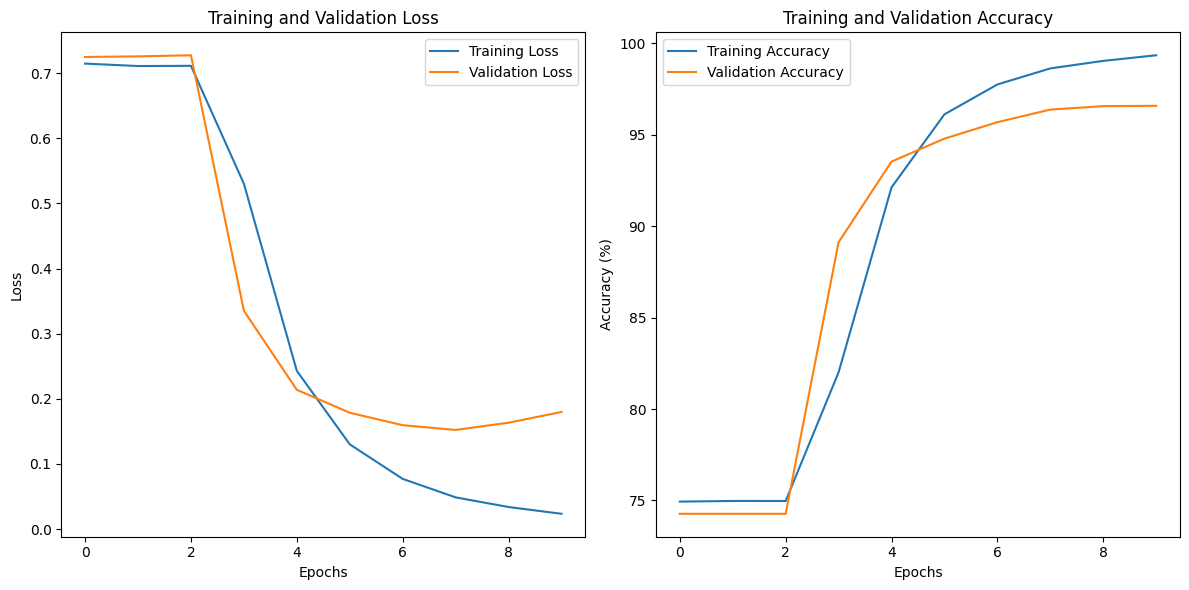

In [ ]:

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

## Evaluate Results of Test Set
(include learning curves & confusion matrix)

Accuracy: 0.9664
Precision: 0.9664
Recall: 0.9664
F1 Score: 0.9663


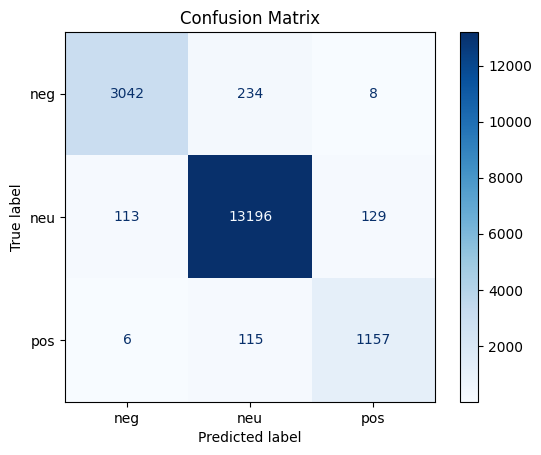

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Make predictions
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# **Customised LSTM Model and Training**

## **Hyperparameters to be considered**


*   Learning Rate
*   Batch_size
*   Num_hid
*   Dropout Probability
*   Epoch

## **Optimisers to be considered**


*   Adam
*   RMSprop (Root Mean Square Propagation)
*   AdamW (Adam with Weight Decay)

## **Embeddings to be considered**

*   GloVe
*   Word2Vec




### **Pros and Cons of Old LSTM vs. LSTM with Attention**

**Old LSTM (Without Attention)**

Pros:
  Simplicity: The architecture is easier to implement and understand, and require fewer parameters, which performance better in smaller datasets and easier tasks. Performs well on short sequence that can be effectively encoded into a single context vector. Solve the vanishing gradient issues in RNNs.

Cons:
  It compress whole sequence into single context vector and the size is unchangeable. Although it solves the long-term dependencies but still struggle with long sequences. Besides, it's hard for researchers figure out which parts of the input sequence significantly impacts the predictions.

**LSTM with Attention**

Pros:


1.   This mechanism allows the model to focus on the most relevant part of the
sequence, ensure its ability could capture the important features.
2.   Could mitigate the vanishing gradient issues then improve the performance on long sequence.
3.   Provide a way to visualize and understand which parts of the input more important.


Cons:

1. Add one layer also implys the complexity increase. The traing process and tuning need more time than previous model.
2. Introduces more parameters, which means more computational costs and need higher memory usage.
3. This may cause issues if it is used analysis the huge dataset.


## LSTM with Attention layer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# add attention layer to imorove the performance
class AttentionLayer(nn.Module):
    def __init__(self, num_hid):
        super(AttentionLayer, self).__init__()
        self.att_weight = nn.Parameter(torch.Tensor(num_hid, 1))
        self.att_bias = nn.Parameter(torch.Tensor(1))

    def forward(self, hidden_seq):
        attn_scores = torch.tanh(hidden_seq @ self.att_weight + self.att_bias)
        attn_weights = torch.softmax(attn_scores, dim=1)
        context_vector = attn_weights * hidden_seq
        context_vector = torch.sum(context_vector, dim=1)
        return context_vector

class CustomLSTMWithAttention(nn.Module):
    def __init__(self, num_input, num_hid, num_out, batch_size=1, num_layers=1, dropout_prob=0.5, embedding_dim=100):
        super(CustomLSTMWithAttention, self).__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        # Add embedding layer
        self.embedding = nn.Embedding(num_input, embedding_dim)

        self.W = nn.Parameter(torch.Tensor(embedding_dim, num_hid * 4))
        self.U = nn.Parameter(torch.Tensor(num_hid, num_hid * 4))
        self.hid_bias = nn.Parameter(torch.Tensor(num_hid * 4))
        self.V = nn.Parameter(torch.Tensor(num_hid, num_out))
        self.out_bias = nn.Parameter(torch.Tensor(num_out))
        self.dropout = nn.Dropout(dropout_prob)
        self.attention = AttentionLayer(num_hid)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.num_hid),
                torch.zeros(self.num_layers, self.batch_size, self.num_hid))

    def forward(self, x, init_states=None):
        x = self.embedding(x)
        batch_size, seq_size, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(batch_size, self.num_hid).to(x.device),
                        torch.zeros(batch_size, self.num_hid).to(x.device))
        else:
            h_t, c_t = init_states

        NH = self.num_hid
        for t in range(seq_size):
            x_t = x[:, t, :]
            gates = x_t @ self.W + h_t @ self.U + self.hid_bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :NH]),     # input gate
                torch.sigmoid(gates[:, NH:NH*2]), # forget gate
                torch.tanh(gates[:, NH*2:NH*3]),  # new values
                torch.sigmoid(gates[:, NH*3:]),   # output gate
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            # Apply dropout
            h_t = self.dropout(h_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()

        # Apply attention
        context_vector = self.attention(hidden_seq)

        output = context_vector @ self.V + self.out_bias
        return hidden_seq, output

## Training

In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

Epoch [1/20], Train Loss: 0.3249, Val Loss: 0.2204, Train Acc: 89.12, Val Acc: 93.38
Epoch [2/20], Train Loss: 0.1526, Val Loss: 0.1716, Train Acc: 95.26, Val Acc: 94.95
Epoch [3/20], Train Loss: 0.0882, Val Loss: 0.1600, Train Acc: 97.30, Val Acc: 95.63
Epoch [4/20], Train Loss: 0.0561, Val Loss: 0.1508, Train Acc: 98.25, Val Acc: 96.28
Epoch [5/20], Train Loss: 0.0369, Val Loss: 0.1536, Train Acc: 98.88, Val Acc: 96.81
Epoch [6/20], Train Loss: 0.0182, Val Loss: 0.1695, Train Acc: 99.47, Val Acc: 97.07
Epoch [7/20], Train Loss: 0.0127, Val Loss: 0.1879, Train Acc: 99.68, Val Acc: 97.16
Epoch [8/20], Train Loss: 0.0102, Val Loss: 0.1939, Train Acc: 99.74, Val Acc: 97.18
Epoch [9/20], Train Loss: 0.0085, Val Loss: 0.2074, Train Acc: 99.79, Val Acc: 97.19
Epoch [10/20], Train Loss: 0.0072, Val Loss: 0.2206, Train Acc: 99.81, Val Acc: 97.21
Epoch [11/20], Train Loss: 0.0058, Val Loss: 0.2244, Train Acc: 99.85, Val Acc: 97.21
Epoch [12/20], Train Loss: 0.0056, Val Loss: 0.2280, Train Acc:

## Visualization

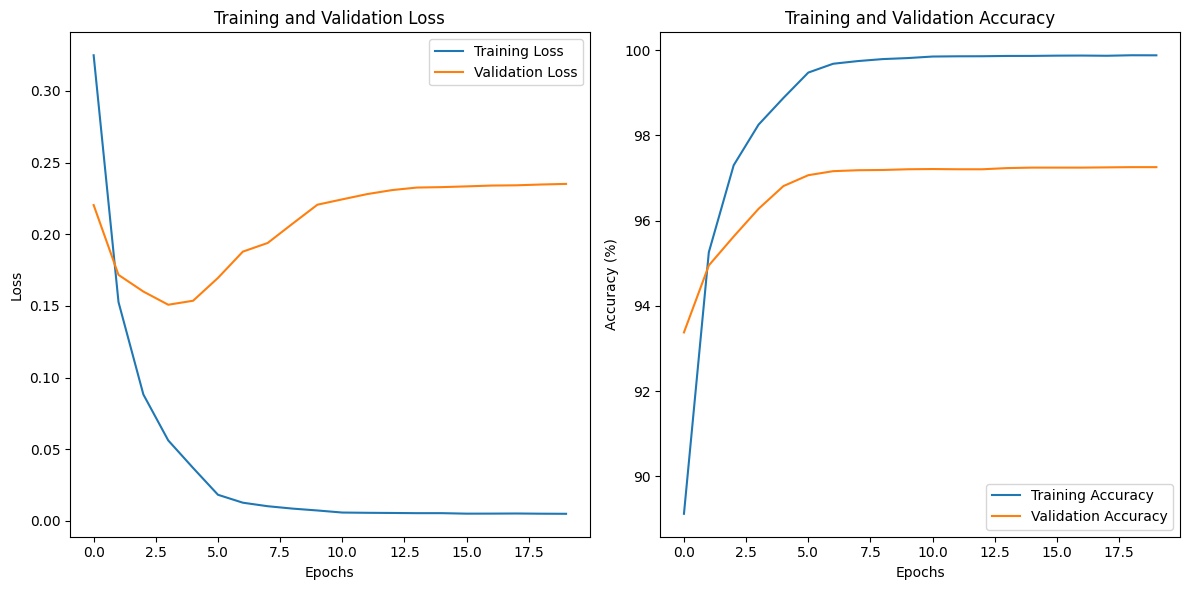

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

## Evaluation Matrix

Accuracy: 0.9736
Precision: 0.9736
Recall: 0.9736
F1 Score: 0.9736


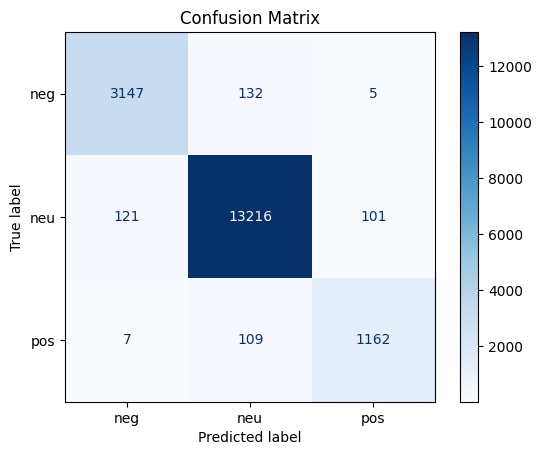

In [ ]:
# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Analysis(Pros & Cons)

**Previous LSTM model:**

*   Result: Accuracy: 0.9664, Precision: 0.9664, Recall: 0.9664, F1 Score: 0.9663   

**Customised model:**

*   Best Result: Accuracy = 0.9736, Precision = 0.9736, Recall = 0.9736, F1 Score = 0.9736


This experiment shows the best results of our Customised LSTM model.
From the better results compared to previous LSTM model, it shows that the attetion layer could captures the important components in training, which may because although the previous LSTM could slove the issue happend by gradient vanishment, sometimes it also shows weakness on processing long range sequences. Anyway, the result show our LSTM with attention layer has better performance. The hyperparameters given are by our hyperparameters tuning result as follows

# **Hyperparameter Tuning**

Experimentation with various combinations of the hyperpatameters.

## Tuning the number of hidden units

*   batch_size = 64
*   num_hid = 128
*   num_out = 3
*   num_layers = 4
*   dropout probability = 0.5
*   learning rate = 0.0015
*   num_epochs = 10



In [ ]:
# The best Model parameters settings
batch_size = 64
num_input = max_length
embedding_dim = 100
num_hid = 128
num_out = 3
num_layers = 4
dropout_prob = 0.5
learning_rate = 0.0015
num_epochs = 10

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch [1/10], Train Loss: 0.3314, Val Loss: 0.2255, Train Acc: 88.99, Val Acc: 92.93
Epoch [2/10], Train Loss: 0.1573, Val Loss: 0.1727, Train Acc: 95.12, Val Acc: 94.99
Epoch [3/10], Train Loss: 0.0949, Val Loss: 0.1562, Train Acc: 97.09, Val Acc: 95.77
Epoch [4/10], Train Loss: 0.0629, Val Loss: 0.1520, Train Acc: 98.01, Val Acc: 95.99
Epoch [5/10], Train Loss: 0.0446, Val Loss: 0.1487, Train Acc: 98.62, Val Acc: 96.70
Epoch [6/10], Train Loss: 0.0252, Val Loss: 0.1664, Train Acc: 99.26, Val Acc: 96.87
Epoch [7/10], Train Loss: 0.0199, Val Loss: 0.1721, Train Acc: 99.44, Val Acc: 97.08
Epoch [8/10], Train Loss: 0.0167, Val Loss: 0.1775, Train Acc: 99.54, Val Acc: 97.13
Epoch [9/10], Train Loss: 0.0148, Val Loss: 0.1814, Train Acc: 99.61, Val Acc: 97.19
Epoch [10/10], Train Loss: 0.0133, Val Loss: 0.1905, Train Acc: 99.64, Val Acc: 97.23
Training complete
Accuracy: 0.9706
Precision: 0.9706
Recall: 0.9706
F1 Score: 0.9706


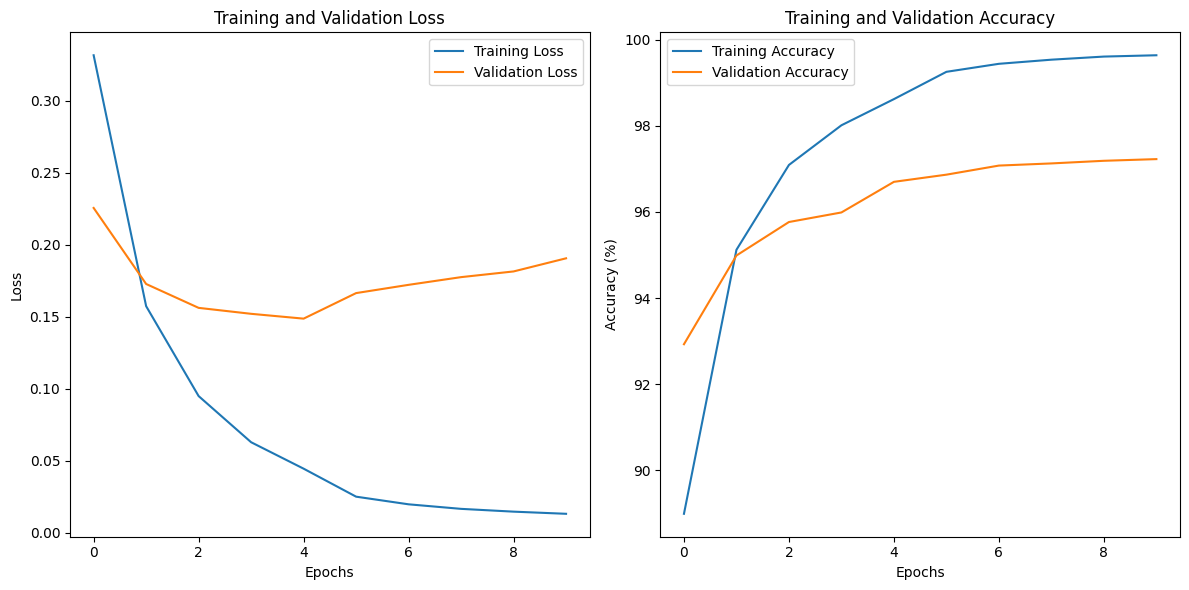

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

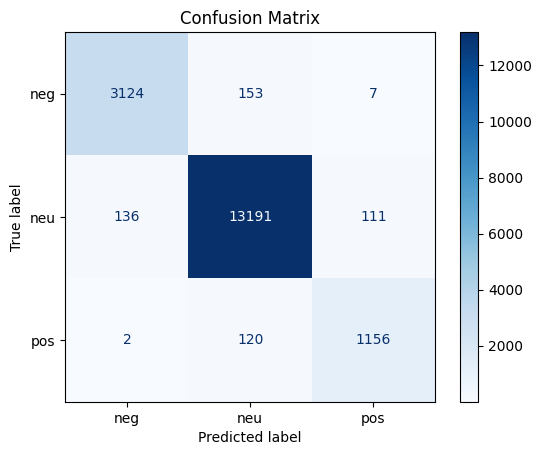

In [ ]:
# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**Analysis:**

The change in smaller number of hidden units decreases the accuracy, may happen because the features are compressed in less units that elements are lost in training process. So we keep previous number of units, which is 256 in next tuning experiments.

## Tuning learning rate to 0.001

*   batch_size = 64
*   num_hid = 256
*   num_out = 3
*   num_layers = 4
*   dropout probability = 0.5
*   learning rate = 0.001
*   num_epochs = 10

In [ ]:
# Model parameters
num_hid = 256
num_out = 3
learning_rate = 0.001
num_epochs = 10

# Instantiate model, loss function, and optimizer
model = LSTM_model(embedding_matrix, num_hid, num_out, num_layers=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")


Epoch [1/10], Train Loss: 0.7118, Val Loss: 0.6363, Train Acc: 74.95, Val Acc: 73.86
Epoch [2/10], Train Loss: 0.3244, Val Loss: 0.2378, Train Acc: 89.36, Val Acc: 92.67
Epoch [3/10], Train Loss: 0.1589, Val Loss: 0.1768, Train Acc: 95.21, Val Acc: 94.87
Epoch [4/10], Train Loss: 0.0870, Val Loss: 0.1613, Train Acc: 97.45, Val Acc: 95.61
Epoch [5/10], Train Loss: 0.0515, Val Loss: 0.1538, Train Acc: 98.50, Val Acc: 96.25
Epoch [6/10], Train Loss: 0.0317, Val Loss: 0.1636, Train Acc: 99.07, Val Acc: 96.63
Epoch [7/10], Train Loss: 0.0209, Val Loss: 0.1579, Train Acc: 99.40, Val Acc: 96.82
Epoch [8/10], Train Loss: 0.0154, Val Loss: 0.1840, Train Acc: 99.54, Val Acc: 96.99
Epoch [9/10], Train Loss: 0.0115, Val Loss: 0.1714, Train Acc: 99.67, Val Acc: 97.07
Epoch [10/10], Train Loss: 0.0099, Val Loss: 0.1770, Train Acc: 99.72, Val Acc: 97.03
Training complete


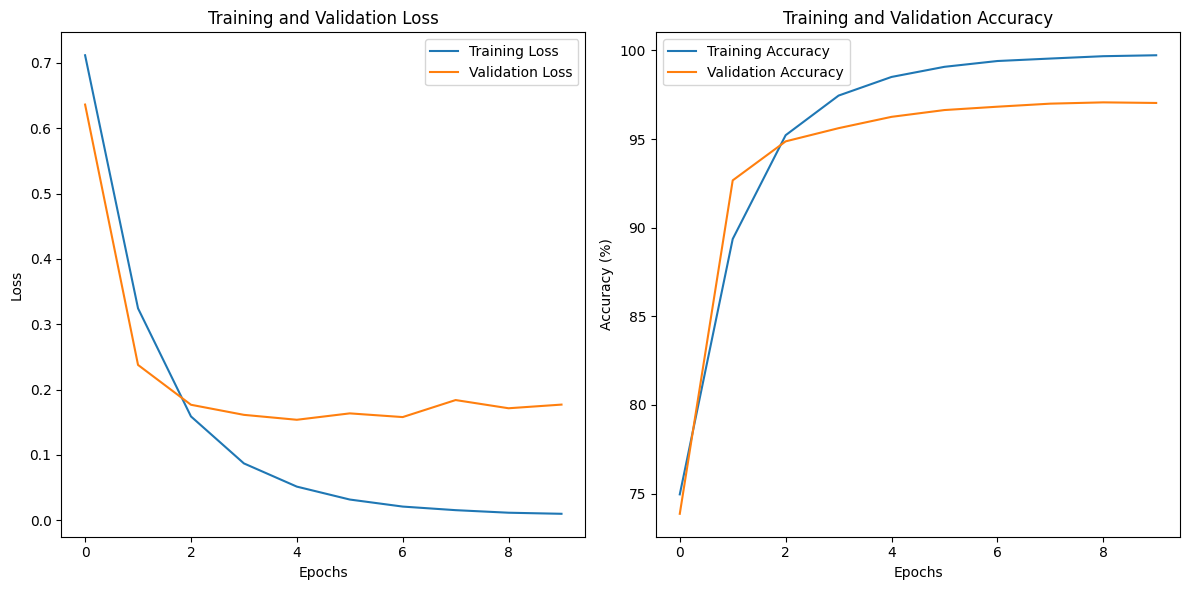

In [ ]:

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

Accuracy: 0.9708
Precision: 0.9708
Recall: 0.9708
F1 Score: 0.9708


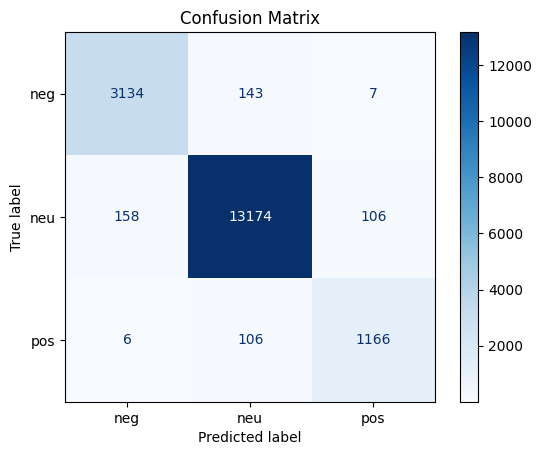

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Make predictions
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**Analysis:**

The smaller learning rate was experimented but the accuracy falls down. The reason is the learning rate is too small that hte new epoch cannot learn something from the pervious, which means the performance tend to a fixed value. So I keep the previous learning rate 0.0015

## Tuning the dropout Probability
*   batch_size = 64
*   num_hid = 256
*   num_out = 3
*   num_layers = 4
*   dropout probability = 0.5
*   learning rate = 0.0015
*   num_epochs = 10


In [ ]:
# The best Model parameters settings
batch_size = 64
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.3
learning_rate = 0.0015
num_epochs = 10

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch [1/10], Train Loss: 0.3266, Val Loss: 0.2291, Train Acc: 89.13, Val Acc: 92.69
Epoch [2/10], Train Loss: 0.1558, Val Loss: 0.1736, Train Acc: 95.12, Val Acc: 94.69
Epoch [3/10], Train Loss: 0.0911, Val Loss: 0.1518, Train Acc: 97.19, Val Acc: 95.71
Epoch [4/10], Train Loss: 0.0578, Val Loss: 0.1464, Train Acc: 98.19, Val Acc: 96.26
Epoch [5/10], Train Loss: 0.0387, Val Loss: 0.1499, Train Acc: 98.82, Val Acc: 96.80
Epoch [6/10], Train Loss: 0.0196, Val Loss: 0.1661, Train Acc: 99.43, Val Acc: 97.11
Epoch [7/10], Train Loss: 0.0143, Val Loss: 0.1806, Train Acc: 99.61, Val Acc: 97.17
Epoch [8/10], Train Loss: 0.0117, Val Loss: 0.1883, Train Acc: 99.69, Val Acc: 97.24
Epoch [9/10], Train Loss: 0.0100, Val Loss: 0.1964, Train Acc: 99.74, Val Acc: 97.36
Epoch [10/10], Train Loss: 0.0086, Val Loss: 0.2010, Train Acc: 99.79, Val Acc: 97.39
Training complete
Accuracy: 0.9723
Precision: 0.9722
Recall: 0.9723
F1 Score: 0.9722


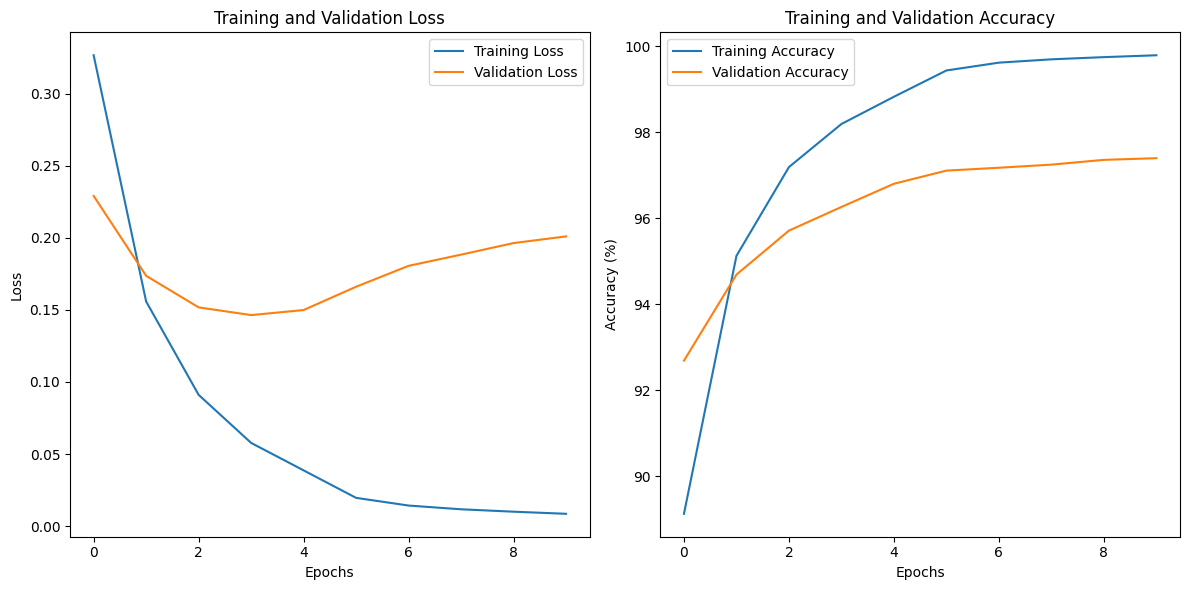

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

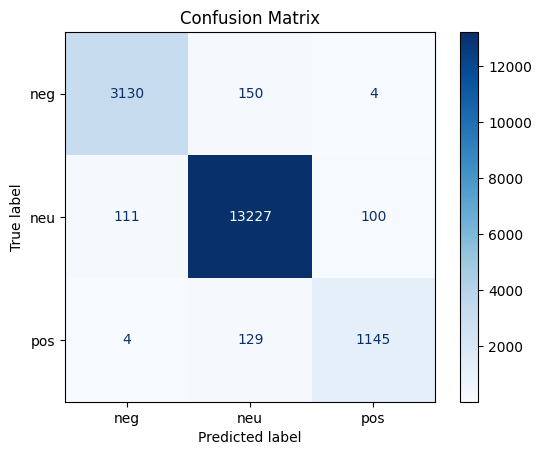

In [ ]:
# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**Analysis:**

The dropout probability is decreased to 0.3 and the accuracy was increased a little bit, indicates that the drooput probability maintain more features of the input data. So I will try smaller dropoout probability but mind the overfit issues meanwhile.

## Tuning the batch_size

*   batch_size = 64
*   num_hid = 256
*   num_out = 3
*   num_layers = 4
*   dropout probability = 0.5
*   learning rate = 0.0015
*   num_epochs = 10


In [ ]:
# The best Model parameters settings
batch_size = 32
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.5
learning_rate = 0.0015
num_epochs = 10

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch [1/10], Train Loss: 0.3285, Val Loss: 0.2180, Train Acc: 89.14, Val Acc: 93.22
Epoch [2/10], Train Loss: 0.1576, Val Loss: 0.1679, Train Acc: 95.07, Val Acc: 95.07
Epoch [3/10], Train Loss: 0.0924, Val Loss: 0.1538, Train Acc: 97.19, Val Acc: 95.72
Epoch [4/10], Train Loss: 0.0602, Val Loss: 0.1568, Train Acc: 98.11, Val Acc: 96.23
Epoch [5/10], Train Loss: 0.0425, Val Loss: 0.1568, Train Acc: 98.66, Val Acc: 96.43
Epoch [6/10], Train Loss: 0.0230, Val Loss: 0.1767, Train Acc: 99.34, Val Acc: 96.79
Epoch [7/10], Train Loss: 0.0176, Val Loss: 0.1884, Train Acc: 99.51, Val Acc: 96.99
Epoch [8/10], Train Loss: 0.0146, Val Loss: 0.1999, Train Acc: 99.59, Val Acc: 97.03
Epoch [9/10], Train Loss: 0.0125, Val Loss: 0.2082, Train Acc: 99.66, Val Acc: 97.12
Epoch [10/10], Train Loss: 0.0109, Val Loss: 0.2188, Train Acc: 99.71, Val Acc: 97.05
Training complete
Accuracy: 0.9711
Precision: 0.9709
Recall: 0.9711
F1 Score: 0.9710


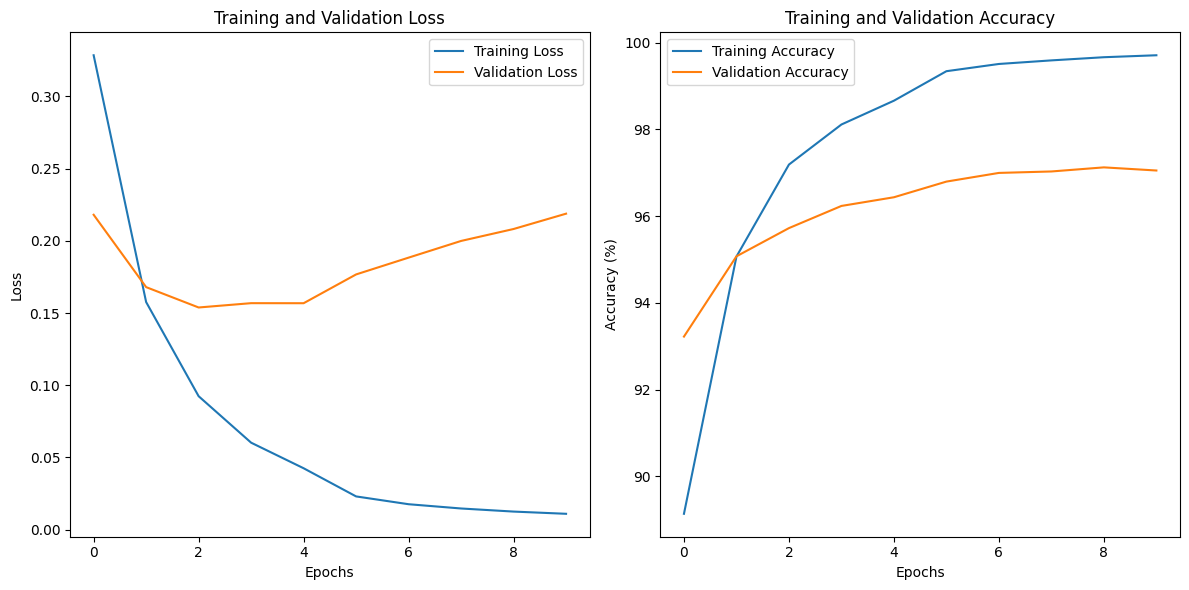

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

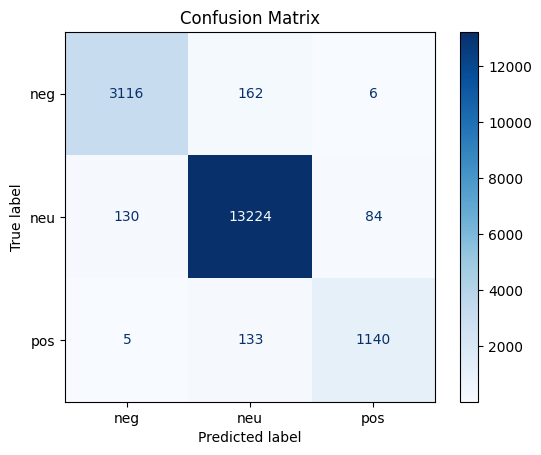

In [ ]:
# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**Analysis:**

The adjustment on batch size using smaller batch_size = 32, the performane seems almost similar to the previous batch size 64, but it will also increase the train time, so I try to keep the batch size 64, ensure the efficiency and the less complexity.

## Tuning the number of epoch

*   batch_size = 64
*   num_hid = 256
*   num_out = 3
*   num_layers = 4
*   dropout probability = 0.2
*   learning rate = 0.0015
*   num_epochs = 20




In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

Epoch [1/20], Train Loss: 0.3249, Val Loss: 0.2204, Train Acc: 89.12, Val Acc: 93.38
Epoch [2/20], Train Loss: 0.1526, Val Loss: 0.1716, Train Acc: 95.26, Val Acc: 94.95
Epoch [3/20], Train Loss: 0.0882, Val Loss: 0.1600, Train Acc: 97.30, Val Acc: 95.63
Epoch [4/20], Train Loss: 0.0561, Val Loss: 0.1508, Train Acc: 98.25, Val Acc: 96.28
Epoch [5/20], Train Loss: 0.0369, Val Loss: 0.1536, Train Acc: 98.88, Val Acc: 96.81
Epoch [6/20], Train Loss: 0.0182, Val Loss: 0.1695, Train Acc: 99.47, Val Acc: 97.07
Epoch [7/20], Train Loss: 0.0127, Val Loss: 0.1879, Train Acc: 99.68, Val Acc: 97.16
Epoch [8/20], Train Loss: 0.0102, Val Loss: 0.1939, Train Acc: 99.74, Val Acc: 97.18
Epoch [9/20], Train Loss: 0.0085, Val Loss: 0.2074, Train Acc: 99.79, Val Acc: 97.19
Epoch [10/20], Train Loss: 0.0072, Val Loss: 0.2206, Train Acc: 99.81, Val Acc: 97.21
Epoch [11/20], Train Loss: 0.0058, Val Loss: 0.2244, Train Acc: 99.85, Val Acc: 97.21
Epoch [12/20], Train Loss: 0.0056, Val Loss: 0.2280, Train Acc:

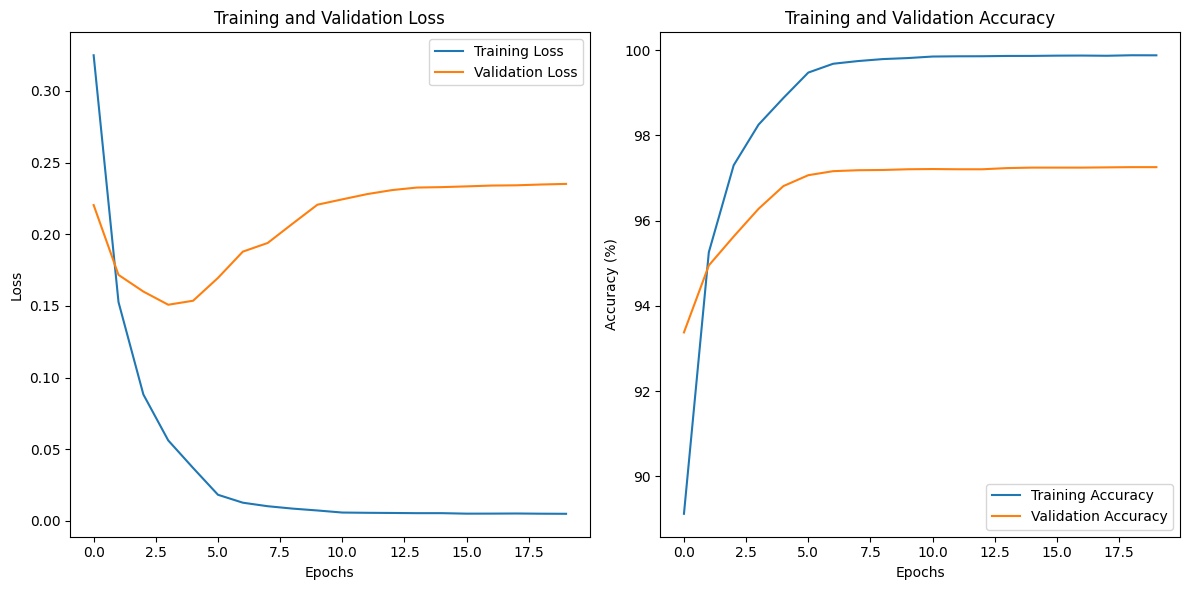

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

Accuracy: 0.9736
Precision: 0.9736
Recall: 0.9736
F1 Score: 0.9736


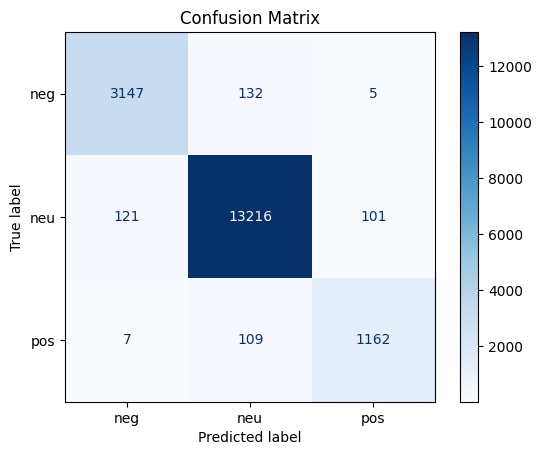

In [ ]:
# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**Analysis:**

After all the adjustment on other parameters, I change the epoch to 20, to see if the performance will increased, and it did give a higher accuracy, so we get the best set of hyperparameters:

**batch_size = 64, num_hid = 256, num_out = 3, num_layers = 4**

**dropout_porb = 0.2, learning rate = 0.0015, num_epochs = 20**

**Get the highest result:**

**Accuracy = 0.9736, Precision = 0.9736, Recall = 0.9736, F1 Score = 0.9736.**



# **My Tuning Summary/Analysis**


1.
batch_size = 64, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.5, learning rate = 0.0015, num_epochs = 10:

Result: Accuracy = 0.9706, Precision = 0.9705, Recall = 0.9706, F1 Score = 0.9705.

2.
batch_size = 32, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.5, learning rate = 0.0015, num_epochs = 10:

Result: Accuracy = 0.9708, Precision = 0.9707, Recall = 0.9708, F1 Score = 0.9707.

3.
batch_size = 32, num_hid = 128, num_out = 3, num_layers = 4,
dropout_porb = 0.5, learning rate = 0.0015, num_epochs = 10:

Result: Accuracy = 0.9686, Precision = 0.9686, Recall = 0.9686, F1 Score = 0.9686.

4.
batch_size = 64, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.3, learning rate = 0.0015, num_epochs = 10:

Result: Accuracy = 0.9721, Precision = 0.9719, Recall = 0.9721, F1 Score = 0.9720.

**5.batch_size = 64, num_hid = 256, num_out = 3, num_layers = 4,
dropout_porb = 0.2, learning rate = 0.0015, num_epochs = 20**

**Result: Accuracy = 0.9736, Precision = 0.9736, Recall = 0.9736, F1 Score = 0.9736.**

**Model 7 performed the best.**







# **Another Optimiser**

RMSprop (Root Mean Square Propagation):

*   RMSprop Keeps a moving average of the squared gradients and adapts the learning rate for each parameter, making it suitable for recurrent neural networks (RNNs) like LSTMs. May not generalize as well as Adam in some cases. But is effective for models with recurrent components, so it's worth to try.

AdamW (Adam with Weight Decay):

*   Pros: Decouples weight decay from the gradient updates, gives better regulatization and generalization. Compared to Adam, it may sightly more computational overhead.




### **RMSprop**

In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch [1/20], Train Loss: 0.3192, Val Loss: 0.2345, Train Acc: 89.59, Val Acc: 92.54
Epoch [2/20], Train Loss: 0.1707, Val Loss: 0.1920, Train Acc: 94.70, Val Acc: 94.19
Epoch [3/20], Train Loss: 0.1159, Val Loss: 0.1811, Train Acc: 96.53, Val Acc: 94.61
Epoch [4/20], Train Loss: 0.0835, Val Loss: 0.1879, Train Acc: 97.48, Val Acc: 94.84
Epoch [5/20], Train Loss: 0.0610, Val Loss: 0.1751, Train Acc: 98.18, Val Acc: 95.45
Epoch [6/20], Train Loss: 0.0313, Val Loss: 0.1942, Train Acc: 99.11, Val Acc: 95.51
Epoch [7/20], Train Loss: 0.0255, Val Loss: 0.2084, Train Acc: 99.29, Val Acc: 95.48
Epoch [8/20], Train Loss: 0.0221, Val Loss: 0.2135, Train Acc: 99.41, Val Acc: 95.71
Epoch [9/20], Train Loss: 0.0192, Val Loss: 0.2200, Train Acc: 99.49, Val Acc: 95.72
Epoch [10/20], Train Loss: 0.0170, Val Loss: 0.2263, Train Acc: 99.57, Val Acc: 95.77
Epoch [11/20], Train Loss: 0.0140, Val Loss: 0.2336, Train Acc: 99.65, Val Acc: 95.71
Epoch [12/20], Train Loss: 0.0141, Val Loss: 0.2349, Train Acc:

### **AdamW**

In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.AdamW(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Epoch [1/20], Train Loss: 0.3249, Val Loss: 0.2207, Train Acc: 89.23, Val Acc: 93.17
Epoch [2/20], Train Loss: 0.1561, Val Loss: 0.1661, Train Acc: 95.16, Val Acc: 94.98
Epoch [3/20], Train Loss: 0.0932, Val Loss: 0.1515, Train Acc: 97.12, Val Acc: 95.83
Epoch [4/20], Train Loss: 0.0590, Val Loss: 0.1472, Train Acc: 98.16, Val Acc: 96.29
Epoch [5/20], Train Loss: 0.0400, Val Loss: 0.1502, Train Acc: 98.78, Val Acc: 96.51
Epoch [6/20], Train Loss: 0.0194, Val Loss: 0.1705, Train Acc: 99.46, Val Acc: 96.82
Epoch [7/20], Train Loss: 0.0137, Val Loss: 0.1799, Train Acc: 99.64, Val Acc: 96.97
Epoch [8/20], Train Loss: 0.0107, Val Loss: 0.2041, Train Acc: 99.73, Val Acc: 97.13
Epoch [9/20], Train Loss: 0.0089, Val Loss: 0.2069, Train Acc: 99.77, Val Acc: 97.19
Epoch [10/20], Train Loss: 0.0073, Val Loss: 0.2229, Train Acc: 99.81, Val Acc: 97.28
Epoch [11/20], Train Loss: 0.0059, Val Loss: 0.2244, Train Acc: 99.85, Val Acc: 97.23
Epoch [12/20], Train Loss: 0.0057, Val Loss: 0.2264, Train Acc:

**Analysis:**

The accuracy decrease in RMSprop Optimizer while the AdamW shows the almost same performance as Adam, so keep Adam optimizer in further experiments.

# **Compare Different Embedding**

## Word2Vec Embedding

### step 1: install gensim

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader as api

# Load pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")  # or your desired model
embedding_dim = 300  # Dimension of the Word2Vec embeddings

### step 2: implementing Word2Vec embedding

In [ ]:
import numpy as np
import torch

# Assuming tokenizer is already fitted
word_index = tokenizer.word_index

# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in word2vec_model:
        embedding_vector = word2vec_model[word]
        embedding_matrix[i] = embedding_vector

# Convert to PyTorch tensor
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

### step 3: train with the best set of hyperparameter

In [ ]:
import torch
import torch.nn as nn
import math

class CustomLSTMWithAttention(nn.Module):
    def __init__(self, num_input, num_hid, num_out, batch_size=1, num_layers=1, dropout_prob=0.2, embedding_matrix=None):
        super(CustomLSTMWithAttention, self).__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Add embedding layer
        if embedding_matrix is not None:
            self.embedding = nn.Embedding.from_pretrained(embedding_matrix)
        else:
            self.embedding = nn.Embedding(num_input, embedding_dim)

        self.W = nn.Parameter(torch.Tensor(embedding_dim, num_hid * 4))
        self.U = nn.Parameter(torch.Tensor(num_hid, num_hid * 4))
        self.hid_bias = nn.Parameter(torch.Tensor(num_hid * 4))
        self.V = nn.Parameter(torch.Tensor(num_hid, num_out))
        self.out_bias = nn.Parameter(torch.Tensor(num_out))
        self.dropout = nn.Dropout(dropout_prob)
        self.attention = AttentionLayer(num_hid)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.num_hid),
                torch.zeros(self.num_layers, self.batch_size, self.num_hid))

    def forward(self, x, init_states=None):
        x = self.embedding(x)
        batch_size, seq_size, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(batch_size, self.num_hid).to(x.device),
                        torch.zeros(batch_size, self.num_hid).to(x.device))
        else:
            h_t, c_t = init_states

        NH = self.num_hid
        for t in range(seq_size):
            x_t = x[:, t, :]
            gates = x_t @ self.W + h_t @ self.U + self.hid_bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :NH]),     # input gate
                torch.sigmoid(gates[:, NH:NH*2]), # forget gate
                torch.tanh(gates[:, NH*2:NH*3]),  # new values
                torch.sigmoid(gates[:, NH*3:]),   # output gate
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            # Apply dropout
            h_t = self.dropout(h_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()

        # Apply attention
        context_vector = self.attention(hidden_seq)

        output = context_vector @ self.V + self.out_bias
        return hidden_seq, output

Epoch [1/20], Train Loss: 0.5868, Val Loss: 0.5237, Train Acc: 0.7926, Val Acc: 0.8214
Epoch [2/20], Train Loss: 0.4636, Val Loss: 0.4433, Train Acc: 0.8444, Val Acc: 0.8563
Epoch [3/20], Train Loss: 0.4052, Val Loss: 0.4004, Train Acc: 0.8683, Val Acc: 0.8714
Epoch [4/20], Train Loss: 0.3664, Val Loss: 0.3666, Train Acc: 0.8808, Val Acc: 0.8818
Epoch [5/20], Train Loss: 0.3265, Val Loss: 0.3409, Train Acc: 0.8943, Val Acc: 0.8917
Epoch [6/20], Train Loss: 0.2868, Val Loss: 0.3100, Train Acc: 0.9075, Val Acc: 0.9018
Epoch [7/20], Train Loss: 0.2498, Val Loss: 0.2949, Train Acc: 0.9198, Val Acc: 0.9091
Epoch [8/20], Train Loss: 0.2164, Val Loss: 0.2727, Train Acc: 0.9311, Val Acc: 0.9179
Epoch [9/20], Train Loss: 0.1884, Val Loss: 0.2526, Train Acc: 0.9394, Val Acc: 0.9252
Epoch [10/20], Train Loss: 0.1619, Val Loss: 0.2460, Train Acc: 0.9482, Val Acc: 0.9301
Epoch [11/20], Train Loss: 0.1390, Val Loss: 0.2200, Train Acc: 0.9547, Val Acc: 0.9389
Epoch [12/20], Train Loss: 0.1200, Val Lo

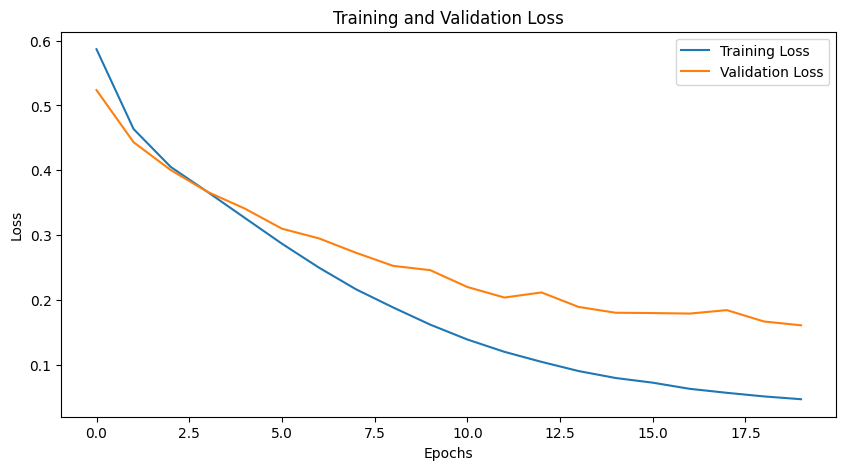

In [ ]:
# Parameters
num_input = len(word_index) + 1  # Vocabulary size
embedding_dim = 300  # Dimension of embeddings
num_hid = 256  # Number of hidden units
num_out = 3  # Number of output classes
num_layers = 4  # Number of LSTM layers
dropout_prob = 0.2  # Dropout probability
learning_rate = 0.0015  # Learning rate
num_epochs = 20  # Number of epochs

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(num_input=num_input, num_hid=num_hid, num_out=num_out, num_layers=num_layers, dropout_prob=dropout_prob, embedding_matrix=embedding_matrix)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Define lists to store loss and accuracy
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for sequences, labels in train_loader:
        optimizer.zero_grad()
        hidden_seq, output = model(sequences)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        _, predicted = torch.max(output, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for sequences, labels in val_loader:
            hidden_seq, output = model(sequences)
            loss = criterion(output, labels)
            total_val_loss += loss.item()

            _, predicted = torch.max(output, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, '
          f'Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

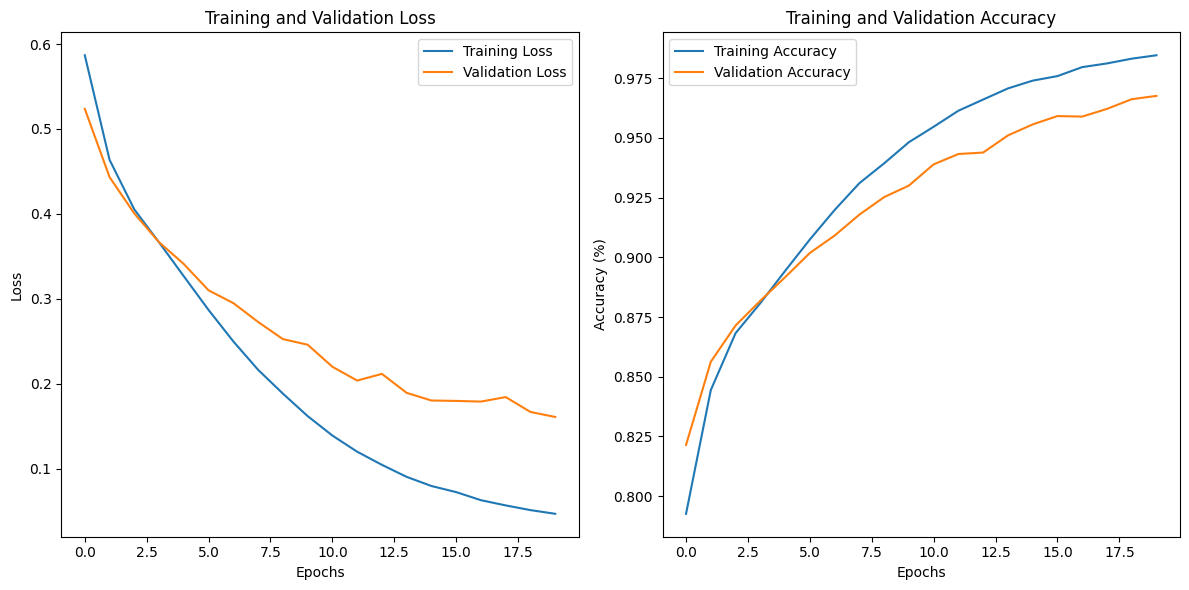

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

Test Results:
Loss: 0.1476
Accuracy: 0.9689
Precision: 0.9687
Recall: 0.9689
F1 Score: 0.9687


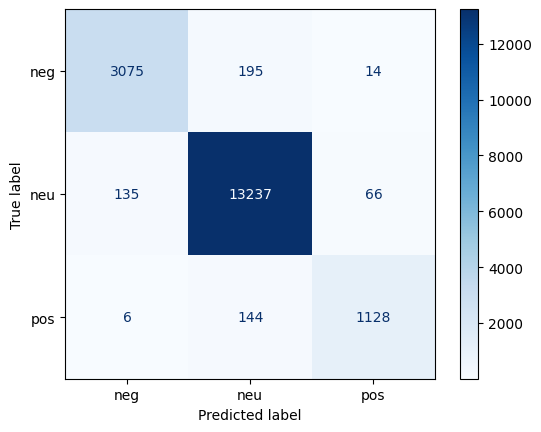

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, data_loader, criterion):
    model.eval()
    all_labels = []
    all_predictions = []
    total_loss = 0

    with torch.no_grad():
        for sequences, labels in data_loader:
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    return avg_loss, accuracy, precision, recall, f1, all_labels, all_predictions

def plot_confusion_matrix(labels, predictions, classes):
    cm = confusion_matrix(labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()


# Evaluate on test data
test_loss, test_accuracy, test_precision, test_recall, test_f1, test_labels, test_predictions = evaluate_model(model, test_loader, criterion)

print('Test Results:')
print(f'Loss: {test_loss:.4f}')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

# Plot confusion matrix
classes = label_encoder.classes_
plot_confusion_matrix(test_labels, test_predictions, classes)

**Analysis:**
Compare the GloVe and Word2Vec (with best set of hyperparameters)

The outputs show that the Glove gives the better results.

Limitation: Need try another embeddings such as FastText in the future.

# **Training on New Dataset:**

## same preprocess

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_A.csv'
url_B = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_B.csv'
url_C = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_C.csv'

original_df = pd.read_csv(url)
original_df_A = pd.read_csv(url_A)
original_df_B = pd.read_csv(url_B)
original_df_C = pd.read_csv(url_C)

# Preparing / Initialization for preprocessed dataset
df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

print(original_df.info())
print(original_df['pred_label'].value_counts())
print(original_df.head())

print("-------------------------------------------------------------------------")
print(original_df_A.info())
print(original_df_A['pred_label'].value_counts())
print(original_df_A.head())

print("-------------------------------------------------------------------------")
print(original_df_B.info())
print(original_df_B['pred_label'].value_counts())
print(original_df_B.head())

print("-------------------------------------------------------------------------")
print(original_df_C.info())
print(original_df_C['pred_label'].value_counts())
print(original_df_C.head())

# @title #### 3.4.1 **Lowercase Conversion**:
df['tweet'] = original_df['tweet'].str.lower()
df_A['tweet'] = original_df_A['tweet'].str.lower()
df_B['tweet'] = original_df_B['tweet'].str.lower()
df_C['tweet'] = original_df_C['tweet'].str.lower()
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])


# @title #### 3.4.2 **Removing URLs**:
def remove_urls(text):
    # Match URLs starting with "http://", "https://", or "www.".
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['tweet'] = df['tweet'].apply(lambda x: remove_urls(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_urls(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_urls(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_urls(x))
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

# @title #### 3.4.3 **Removing mentions and hashtags**:
def remove_mentions_hashtags(text):
    mention_pattern = re.compile(r'@\w+')
    hashtag_pattern = re.compile(r'#\w+')
    text = mention_pattern.sub(r'', text)
    text = hashtag_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_mentions_hashtags(x))
print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])


# @title #### 3.4.4 Remove special characters and punctuation
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_char_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_special_characters(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_special_characters(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_special_characters(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_special_characters(x))

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])


# @title #### 3.4.5 Removing Stop Words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stop words corpus

# Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df['tweet'] = df['tweet'].apply(remove_stopwords)
df_A['tweet'] = df_A['tweet'].apply(remove_stopwords)
df_B['tweet'] = df_B['tweet'].apply(remove_stopwords)
df_C['tweet'] = df_C['tweet'].apply(remove_stopwords)

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet       90000 non-null  object
 1   pred_label  90000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB
None
pred_label
0    41609
1    40472
2     7919
Name: count, dtype: int64
                                               tweet  pred_label
0            Coronavirus Human Coronavirus Types CDC           1
1  shehryar taseer That s true Corona virus swine...           1
2  TLDR Not SARS possibly new coronavirus Difficu...           1
3  Disease outbreak news from the WHO Middle East...           1
4  China Media WSJ says sources tell them mystery...           1
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


shehryar taseer That s true Corona virus swine flue Bird flu in December when whole Pk is busy in Marriage
------------------------------------------------------------------------
shehryar taseer true corona virus swine flue bird flu december whole pk busy marriage


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the texts
df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: word_tokenize(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: word_tokenize(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: word_tokenize(x))

print(df['tweet'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [coronavirus, human, coronavirus, types, cdc]
1    [shehryar, taseer, true, corona, virus, swine,...
2    [tldr, sars, possibly, new, coronavirus, diffi...
3    [disease, outbreak, news, middle, east, respir...
4    [china, media, wsj, says, sources, tell, myste...
Name: tweet, dtype: object


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
import torch


# Combine all datasets into one list of tokenized texts
all_texts = df['tweet'].tolist() + df_A['tweet'].tolist() + df_B['tweet'].tolist() + df_C['tweet'].tolist()

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(text) for text in all_texts])

# Convert the tokenized texts to sequences of integers
df['tweet'] = df['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_A['tweet'] = df_A['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_B['tweet'] = df_B['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_C['tweet'] = df_C['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])



In [ ]:
max_length = max(max(len(seq) for seq in df['tweet']),
                 max(len(seq) for seq in df_A['tweet']),
                 max(len(seq) for seq in df_B['tweet']),
                 max(len(seq) for seq in df_C['tweet']))

# Pad the sequences
df['tweet'] = pad_sequences(df['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_A['tweet'] = pad_sequences(df_A['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_B['tweet'] = pad_sequences(df_B['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_C['tweet'] = pad_sequences(df_C['tweet'].tolist(), maxlen=max_length, padding='post').tolist()

print(df['tweet'].head())
# Verify the result by mapping back to words
i = 0  # Example index
tokenized_sequence = df.iloc[i, 0]
mapped_words = [tokenizer.index_word[token] for token in tokenized_sequence if token != 0]
print(f"Original Text {i}: {' '.join(all_texts[i])}")
print(f"Tokenized Sequence {i}: {tokenized_sequence}")
print(f"Mapped Words {i}: {' '.join(mapped_words)}")

0    [1, 293, 1, 2703, 70, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [24272, 24273, 528, 3, 2, 1821, 9261, 2215, 42...
2    [10351, 169, 1404, 7, 1, 2529, 800, 113, 1100,...
3    [98, 6, 13, 1002, 840, 1208, 2319, 1, 1498, 12...
4    [4, 106, 1499, 22, 1318, 289, 3281, 815, 7, 1,...
Name: tweet, dtype: object
Original Text 0: coronavirus human coronavirus types cdc
Tokenized Sequence 0: [1, 293, 1, 2703, 70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Mapped Words 0: coronavirus human coronavirus types cdc


In [ ]:
import numpy as np

# Load GloVe embeddings
embedding_index = {}
with open("drive/MyDrive/Jialiang/9444/COVID19/glove/glove.6B.100d.txt", "r", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100  # Size of GloVe embeddings
word_index = tokenizer.word_index  # Assuming tokenizer is already fitted
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert to PyTorch tensor
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

# Combine all data into a single DataFrame
all_data = pd.concat([df, df_A, df_B, df_C], ignore_index=True)

# Prepare labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_data['pred_label'] = label_encoder.fit_transform(all_data['pred_label'])
labels = all_data['pred_label'].values

# Convert sequences to numpy array
sequences = np.array(all_data['tweet'].tolist())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Create datasets
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test, y_test)

# batch_size = 32
batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# add attention layer to imorove the performance
class AttentionLayer(nn.Module):
    def __init__(self, num_hid):
        super(AttentionLayer, self).__init__()
        self.att_weight = nn.Parameter(torch.Tensor(num_hid, 1))
        self.att_bias = nn.Parameter(torch.Tensor(1))

    def forward(self, hidden_seq):
        attn_scores = torch.tanh(hidden_seq @ self.att_weight + self.att_bias)
        attn_weights = torch.softmax(attn_scores, dim=1)
        context_vector = attn_weights * hidden_seq
        context_vector = torch.sum(context_vector, dim=1)
        return context_vector

class CustomLSTMWithAttention(nn.Module):
    def __init__(self, num_input, num_hid, num_out, batch_size=1, num_layers=1, dropout_prob=0.5, embedding_dim=100):
        super(CustomLSTMWithAttention, self).__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        # Add embedding layer
        self.embedding = nn.Embedding(num_input, embedding_dim)

        self.W = nn.Parameter(torch.Tensor(embedding_dim, num_hid * 4))
        self.U = nn.Parameter(torch.Tensor(num_hid, num_hid * 4))
        self.hid_bias = nn.Parameter(torch.Tensor(num_hid * 4))
        self.V = nn.Parameter(torch.Tensor(num_hid, num_out))
        self.out_bias = nn.Parameter(torch.Tensor(num_out))
        self.dropout = nn.Dropout(dropout_prob)
        self.attention = AttentionLayer(num_hid)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.num_hid),
                torch.zeros(self.num_layers, self.batch_size, self.num_hid))

    def forward(self, x, init_states=None):
        x = self.embedding(x)
        batch_size, seq_size, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(batch_size, self.num_hid).to(x.device),
                        torch.zeros(batch_size, self.num_hid).to(x.device))
        else:
            h_t, c_t = init_states

        NH = self.num_hid
        for t in range(seq_size):
            x_t = x[:, t, :]
            gates = x_t @ self.W + h_t @ self.U + self.hid_bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :NH]),     # input gate
                torch.sigmoid(gates[:, NH:NH*2]), # forget gate
                torch.tanh(gates[:, NH*2:NH*3]),  # new values
                torch.sigmoid(gates[:, NH*3:]),   # output gate
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            # Apply dropout
            h_t = self.dropout(h_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()

        # Apply attention
        context_vector = self.attention(hidden_seq)

        output = context_vector @ self.V + self.out_bias
        return hidden_seq, output

In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

Epoch [1/20], Train Loss: 0.6232, Val Loss: 0.4937, Train Acc: 72.24, Val Acc: 79.57
Epoch [2/20], Train Loss: 0.3550, Val Loss: 0.3958, Train Acc: 86.03, Val Acc: 84.59
Epoch [3/20], Train Loss: 0.2256, Val Loss: 0.3804, Train Acc: 91.15, Val Acc: 87.20
Epoch [4/20], Train Loss: 0.1639, Val Loss: 0.3550, Train Acc: 93.64, Val Acc: 88.81
Epoch [5/20], Train Loss: 0.1244, Val Loss: 0.3966, Train Acc: 95.22, Val Acc: 89.23
Epoch [6/20], Train Loss: 0.0782, Val Loss: 0.4639, Train Acc: 97.02, Val Acc: 90.18
Epoch [7/20], Train Loss: 0.0646, Val Loss: 0.5006, Train Acc: 97.54, Val Acc: 90.58
Epoch [8/20], Train Loss: 0.0569, Val Loss: 0.5366, Train Acc: 97.85, Val Acc: 90.78
Epoch [9/20], Train Loss: 0.0514, Val Loss: 0.5704, Train Acc: 98.01, Val Acc: 91.01
Epoch [10/20], Train Loss: 0.0473, Val Loss: 0.5766, Train Acc: 98.16, Val Acc: 91.22
Epoch [11/20], Train Loss: 0.0412, Val Loss: 0.5939, Train Acc: 98.44, Val Acc: 91.32
Epoch [12/20], Train Loss: 0.0409, Val Loss: 0.6037, Train Acc:

Accuracy: 0.9132
Precision: 0.9134
Recall: 0.9132
F1 Score: 0.9133


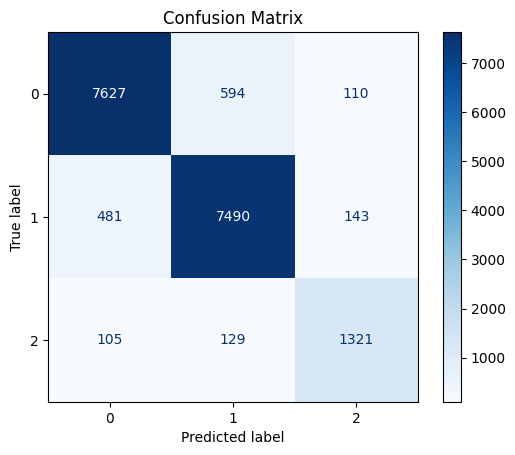

In [ ]:
# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## with stop word

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_A.csv'
url_B = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_B.csv'
url_C = 'https://raw.githubusercontent.com/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/main/Re-COVIDSenti_C.csv'

original_df = pd.read_csv(url)
original_df_A = pd.read_csv(url_A)
original_df_B = pd.read_csv(url_B)
original_df_C = pd.read_csv(url_C)

# Preparing / Initialization for preprocessed dataset
df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

print(original_df.info())
print(original_df['pred_label'].value_counts())
print(original_df.head())

print("-------------------------------------------------------------------------")
print(original_df_A.info())
print(original_df_A['pred_label'].value_counts())
print(original_df_A.head())

print("-------------------------------------------------------------------------")
print(original_df_B.info())
print(original_df_B['pred_label'].value_counts())
print(original_df_B.head())

print("-------------------------------------------------------------------------")
print(original_df_C.info())
print(original_df_C['pred_label'].value_counts())
print(original_df_C.head())

# @title #### 3.4.1 **Lowercase Conversion**:
df['tweet'] = original_df['tweet'].str.lower()
df_A['tweet'] = original_df_A['tweet'].str.lower()
df_B['tweet'] = original_df_B['tweet'].str.lower()
df_C['tweet'] = original_df_C['tweet'].str.lower()
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])


# @title #### 3.4.2 **Removing URLs**:
def remove_urls(text):
    # Match URLs starting with "http://", "https://", or "www.".
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['tweet'] = df['tweet'].apply(lambda x: remove_urls(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_urls(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_urls(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_urls(x))
print(original_df.iloc[0, 0])
print(df.iloc[0, 0])

# @title #### 3.4.3 **Removing mentions and hashtags**:
def remove_mentions_hashtags(text):
    mention_pattern = re.compile(r'@\w+')
    hashtag_pattern = re.compile(r'#\w+')
    text = mention_pattern.sub(r'', text)
    text = hashtag_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_mentions_hashtags(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_mentions_hashtags(x))
print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])


# @title #### 3.4.4 Remove special characters and punctuation
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_char_pattern.sub(r'', text)
    return text

df['tweet'] = df['tweet'].apply(lambda x: remove_special_characters(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_special_characters(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: remove_special_characters(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: remove_special_characters(x))

print(original_df.iloc[1, 0])
print("------------------------------------------------------------------------")
print(df.iloc[1, 0])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet       90000 non-null  object
 1   pred_label  90000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB
None
pred_label
0    41609
1    40472
2     7919
Name: count, dtype: int64
                                               tweet  pred_label
0            Coronavirus Human Coronavirus Types CDC           1
1  shehryar taseer That s true Corona virus swine...           1
2  TLDR Not SARS possibly new coronavirus Difficu...           1
3  Disease outbreak news from the WHO Middle East...           1
4  China Media WSJ says sources tell them mystery...           1
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dt

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the texts
df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(x))
df_A['tweet'] = df_A['tweet'].apply(lambda x: word_tokenize(x))
df_B['tweet'] = df_B['tweet'].apply(lambda x: word_tokenize(x))
df_C['tweet'] = df_C['tweet'].apply(lambda x: word_tokenize(x))

print(df['tweet'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0        [coronavirus, human, coronavirus, types, cdc]
1    [shehryar, taseer, that, s, true, corona, viru...
2    [tldr, not, sars, possibly, new, coronavirus, ...
3    [disease, outbreak, news, from, the, who, midd...
4    [china, media, wsj, says, sources, tell, them,...
Name: tweet, dtype: object


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import Dataset, DataLoader
import torch


# Combine all datasets into one list of tokenized texts
all_texts = df['tweet'].tolist() + df_A['tweet'].tolist() + df_B['tweet'].tolist() + df_C['tweet'].tolist()

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(text) for text in all_texts])

# Convert the tokenized texts to sequences of integers
df['tweet'] = df['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_A['tweet'] = df_A['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_B['tweet'] = df_B['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])
df_C['tweet'] = df_C['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])



In [ ]:
max_length = max(max(len(seq) for seq in df['tweet']),
                 max(len(seq) for seq in df_A['tweet']),
                 max(len(seq) for seq in df_B['tweet']),
                 max(len(seq) for seq in df_C['tweet']))

# Pad the sequences
df['tweet'] = pad_sequences(df['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_A['tweet'] = pad_sequences(df_A['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_B['tweet'] = pad_sequences(df_B['tweet'].tolist(), maxlen=max_length, padding='post').tolist()
df_C['tweet'] = pad_sequences(df_C['tweet'].tolist(), maxlen=max_length, padding='post').tolist()

print(df['tweet'].head())

0    [1, 396, 1, 2838, 140, 0, 0, 0, 0, 0, 0, 0, 0,...
1    [24418, 24419, 22, 15, 644, 12, 10, 1952, 9404...
2    [10494, 29, 259, 1532, 31, 1, 2664, 3, 921, 87...
3    [173, 30, 44, 16, 2, 46, 1122, 961, 1333, 2452...
4    [17, 182, 1627, 72, 1445, 392, 276, 3417, 936,...
Name: tweet, dtype: object


In [ ]:
# Verify the result by mapping back to words
i = 0  # Example index
tokenized_sequence = df.iloc[i, 0]
mapped_words = [tokenizer.index_word[token] for token in tokenized_sequence if token != 0]
print(f"Original Text {i}: {' '.join(all_texts[i])}")
print(f"Tokenized Sequence {i}: {tokenized_sequence}")
print(f"Mapped Words {i}: {' '.join(mapped_words)}")

Original Text 0: coronavirus human coronavirus types cdc
Tokenized Sequence 0: [1, 396, 1, 2838, 140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Mapped Words 0: coronavirus human coronavirus types cdc


In [ ]:
import numpy as np

# Load GloVe embeddings
embedding_index = {}
with open("drive/MyDrive/Jialiang/9444/COVID19/glove/glove.6B.100d.txt", "r", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100  # Size of GloVe embeddings
word_index = tokenizer.word_index  # Assuming tokenizer is already fitted
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert to PyTorch tensor
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

# Combine all data into a single DataFrame
all_data = pd.concat([df, df_A, df_B, df_C], ignore_index=True)

# Prepare labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_data['pred_label'] = label_encoder.fit_transform(all_data['pred_label'])
labels = all_data['pred_label'].values

# Convert sequences to numpy array
sequences = np.array(all_data['tweet'].tolist())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Create datasets
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test, y_test)

# batch_size = 32
batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# add attention layer to imorove the performance
class AttentionLayer(nn.Module):
    def __init__(self, num_hid):
        super(AttentionLayer, self).__init__()
        self.att_weight = nn.Parameter(torch.Tensor(num_hid, 1))
        self.att_bias = nn.Parameter(torch.Tensor(1))

    def forward(self, hidden_seq):
        attn_scores = torch.tanh(hidden_seq @ self.att_weight + self.att_bias)
        attn_weights = torch.softmax(attn_scores, dim=1)
        context_vector = attn_weights * hidden_seq
        context_vector = torch.sum(context_vector, dim=1)
        return context_vector

class CustomLSTMWithAttention(nn.Module):
    def __init__(self, num_input, num_hid, num_out, batch_size=1, num_layers=1, dropout_prob=0.5, embedding_dim=100):
        super(CustomLSTMWithAttention, self).__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        # Add embedding layer
        self.embedding = nn.Embedding(num_input, embedding_dim)

        self.W = nn.Parameter(torch.Tensor(embedding_dim, num_hid * 4))
        self.U = nn.Parameter(torch.Tensor(num_hid, num_hid * 4))
        self.hid_bias = nn.Parameter(torch.Tensor(num_hid * 4))
        self.V = nn.Parameter(torch.Tensor(num_hid, num_out))
        self.out_bias = nn.Parameter(torch.Tensor(num_out))
        self.dropout = nn.Dropout(dropout_prob)
        self.attention = AttentionLayer(num_hid)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.num_hid),
                torch.zeros(self.num_layers, self.batch_size, self.num_hid))

    def forward(self, x, init_states=None):
        x = self.embedding(x)
        batch_size, seq_size, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(batch_size, self.num_hid).to(x.device),
                        torch.zeros(batch_size, self.num_hid).to(x.device))
        else:
            h_t, c_t = init_states

        NH = self.num_hid
        for t in range(seq_size):
            x_t = x[:, t, :]
            gates = x_t @ self.W + h_t @ self.U + self.hid_bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :NH]),     # input gate
                torch.sigmoid(gates[:, NH:NH*2]), # forget gate
                torch.tanh(gates[:, NH*2:NH*3]),  # new values
                torch.sigmoid(gates[:, NH*3:]),   # output gate
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            # Apply dropout
            h_t = self.dropout(h_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()

        # Apply attention
        context_vector = self.attention(hidden_seq)

        output = context_vector @ self.V + self.out_bias
        return hidden_seq, output

In [ ]:
# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

Epoch [1/20], Train Loss: 0.6098, Val Loss: 0.4930, Train Acc: 73.28, Val Acc: 79.48
Epoch [2/20], Train Loss: 0.3530, Val Loss: 0.3755, Train Acc: 86.07, Val Acc: 85.44
Epoch [3/20], Train Loss: 0.2250, Val Loss: 0.3469, Train Acc: 91.20, Val Acc: 87.60
Epoch [4/20], Train Loss: 0.1614, Val Loss: 0.3427, Train Acc: 93.73, Val Acc: 89.09
Epoch [5/20], Train Loss: 0.1225, Val Loss: 0.3664, Train Acc: 95.27, Val Acc: 90.17
Epoch [6/20], Train Loss: 0.0751, Val Loss: 0.4288, Train Acc: 97.18, Val Acc: 90.89
Epoch [7/20], Train Loss: 0.0613, Val Loss: 0.4694, Train Acc: 97.66, Val Acc: 91.17
Epoch [8/20], Train Loss: 0.0538, Val Loss: 0.5084, Train Acc: 97.91, Val Acc: 91.34
Epoch [9/20], Train Loss: 0.0481, Val Loss: 0.5361, Train Acc: 98.15, Val Acc: 91.62
Epoch [10/20], Train Loss: 0.0440, Val Loss: 0.5645, Train Acc: 98.29, Val Acc: 91.93
Epoch [11/20], Train Loss: 0.0380, Val Loss: 0.5796, Train Acc: 98.53, Val Acc: 91.96
Epoch [12/20], Train Loss: 0.0372, Val Loss: 0.5906, Train Acc:

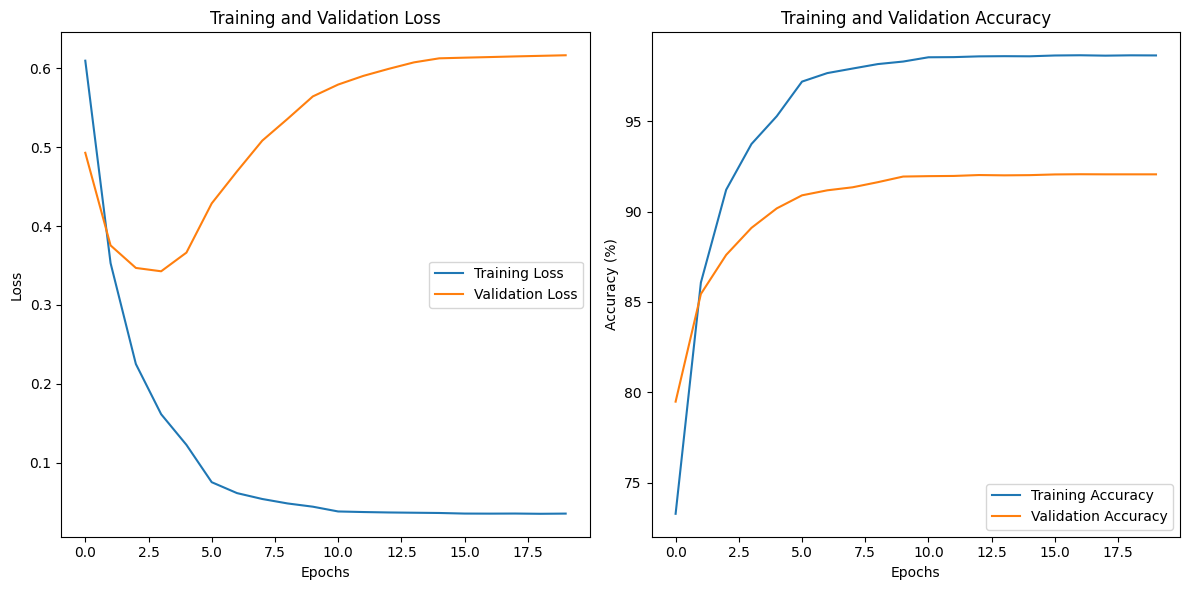

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

Accuracy: 0.9199
Precision: 0.9199
Recall: 0.9199
F1 Score: 0.9199


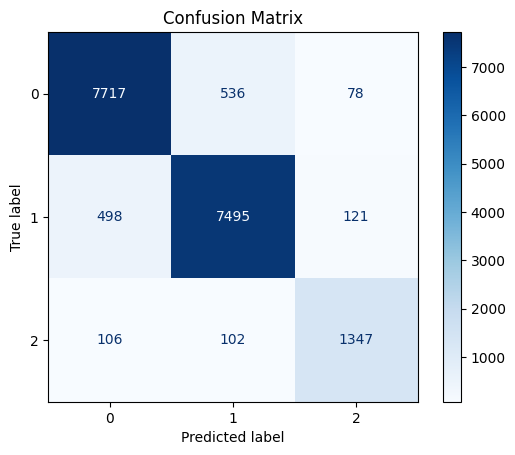

In [ ]:
# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Training on New_Senti_A(relabelling dataset with remove part of the wrong labels)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB
None
label
1    19328
0     8729
2     1943
Name: count, dtype: int64
                                               tweet  label
0            Coronavirus Human Coronavirus Types CDC      1
1  shehryar taseer That s true , Corona virus swi...      1
2  TLDR Not SARS, possibly new coronavirus. Diffi...      1
3  Disease outbreak news from the WHO Middle East...      1
4  China Media WSJ says sources tell them mystery...      1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Epoch [1/20], Train Loss: 0.7149, Val Loss: 0.6388, Train Acc: 70.31, Val Acc: 74.33
Epoch [2/20], Train Loss: 0.5085, Val Loss: 0.6244, Train Acc: 80.38, Val Acc: 74.80
Epoch [3/20], Train Loss: 0.3490, Val Loss: 0.6673, Train Acc: 87.08, Val Acc: 73.83
Epoch [4/20], Train Loss: 0.2466, Val Loss: 0.7213, Train Acc: 91.13, Val Acc: 73.97
Epoch [5/20], Train Loss: 0.1837, Val Loss: 0.8512, Train Acc: 93.38, Val Acc: 72.83
Epoch [6/20], Train Loss: 0.1083, Val Loss: 1.0338, Train Acc: 96.39, Val Acc: 72.77
Epoch [7/20], Train Loss: 0.0955, Val Loss: 1.0695, Train Acc: 96.78, Val Acc: 72.70
Epoch [8/20], Train Loss: 0.0866, Val Loss: 1.2137, Train Acc: 97.08, Val Acc: 72.00
Epoch [9/20], Train Loss: 0.0796, Val Loss: 1.2249, Train Acc: 97.23, Val Acc: 71.73
Epoch [10/20], Train Loss: 0.0735, Val Loss: 1.4688, Train Acc: 97.43, Val Acc: 71.30
Epoch [11/20], Train Loss: 0.0649, Val Loss: 1.4737, Train Acc: 97.66, Val Acc: 71.27
Epoch [12/20], Train Loss: 0.0639, Val Loss: 1.5091, Train Acc:

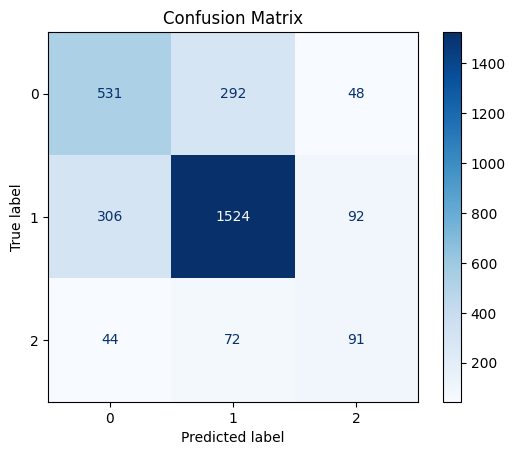

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay



# Load the Newest-COVIDSenti_A.csv file
newest_file_path = '/content/drive/MyDrive/Jialiang/9444/Newest-COVIDSenti_A.csv'  # Update this path
original_df_A = pd.read_csv(newest_file_path)

# Preparing / Initialization for preprocessed dataset
df_A = pd.read_csv(newest_file_path)

# Initial information and statistics
print(original_df_A.info())
print(original_df_A['label'].value_counts())
print(original_df_A.head())

# Lowercase Conversion
df_A['tweet'] = original_df_A['tweet'].str.lower()

# Removing URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_urls(x))

# Removing mentions and hashtags
def remove_mentions_hashtags(text):
    mention_pattern = re.compile(r'@\w+')
    hashtag_pattern = re.compile(r'#\w+')
    text = mention_pattern.sub(r'', text)
    text = hashtag_pattern.sub(r'', text)
    return text

df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_mentions_hashtags(x))

# Removing special characters and punctuation
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_char_pattern.sub(r'', text)
    return text

df_A['tweet'] = df_A['tweet'].apply(lambda x: remove_special_characters(x))

# Removing Stop Words
nltk.download('stopwords')
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df_A['tweet'] = df_A['tweet'].apply(remove_stopwords)

# Tokenization
nltk.download('punkt')
df_A['tweet'] = df_A['tweet'].apply(lambda x: word_tokenize(x))

# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(text) for text in df_A['tweet'].tolist()])

# Convert the tokenized texts to sequences of integers
df_A['tweet'] = df_A['tweet'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(x)])[0])

# Padding sequences
max_length = max(len(seq) for seq in df_A['tweet'])
df_A['tweet'] = pad_sequences(df_A['tweet'].tolist(), maxlen=max_length, padding='post').tolist()

# Prepare labels
label_encoder = LabelEncoder()
df_A['label'] = label_encoder.fit_transform(df_A['label'])
labels = df_A['label'].values

# Convert sequences to numpy array
sequences = np.array(df_A['tweet'].tolist())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.tensor(self.sequences[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Create datasets
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test, y_test)

# Set batch size
batch_size = 64

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model with attention
class AttentionLayer(nn.Module):
    def __init__(self, num_hid):
        super(AttentionLayer, self).__init__()
        self.att_weight = nn.Parameter(torch.Tensor(num_hid, 1))
        self.att_bias = nn.Parameter(torch.Tensor(1))

    def forward(self, hidden_seq):
        attn_scores = torch.tanh(hidden_seq @ self.att_weight + self.att_bias)
        attn_weights = torch.softmax(attn_scores, dim=1)
        context_vector = attn_weights * hidden_seq
        context_vector = torch.sum(context_vector, dim=1)
        return context_vector

class CustomLSTMWithAttention(nn.Module):
    def __init__(self, num_input, num_hid, num_out, batch_size=1, num_layers=1, dropout_prob=0.5, embedding_dim=100):
        super(CustomLSTMWithAttention, self).__init__()
        self.num_hid = num_hid
        self.batch_size = batch_size
        self.num_layers = num_layers
        # Add embedding layer
        self.embedding = nn.Embedding(num_input, embedding_dim)

        self.W = nn.Parameter(torch.Tensor(embedding_dim, num_hid * 4))
        self.U = nn.Parameter(torch.Tensor(num_hid, num_hid * 4))
        self.hid_bias = nn.Parameter(torch.Tensor(num_hid * 4))
        self.V = nn.Parameter(torch.Tensor(num_hid, num_out))
        self.out_bias = nn.Parameter(torch.Tensor(num_out))
        self.dropout = nn.Dropout(dropout_prob)
        self.attention = AttentionLayer(num_hid)
        self.init_weights()

    def init_weights(self):
        stdv = 1.0 / math.sqrt(self.num_hid)
        for weight in self.parameters():
            weight.data.uniform_(-stdv, stdv)

    def init_hidden(self):
        return (torch.zeros(self.num_layers, self.batch_size, self.num_hid),
                torch.zeros(self.num_layers, self.batch_size, self.num_hid))

    def forward(self, x, init_states=None):
        x = self.embedding(x)
        batch_size, seq_size, _ = x.size()
        hidden_seq = []
        if init_states is None:
            h_t, c_t = (torch.zeros(batch_size, self.num_hid).to(x.device),
                        torch.zeros(batch_size, self.num_hid).to(x.device))
        else:
            h_t, c_t = init_states

        NH = self.num_hid
        for t in range(seq_size):
            x_t = x[:, t, :]
            gates = x_t @ self.W + h_t @ self.U + self.hid_bias
            i_t, f_t, g_t, o_t = (
                torch.sigmoid(gates[:, :NH]),     # input gate
                torch.sigmoid(gates[:, NH:NH*2]), # forget gate
                torch.tanh(gates[:, NH*2:NH*3]),  # new values
                torch.sigmoid(gates[:, NH*3:]),   # output gate
            )
            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
            # Apply dropout
            h_t = self.dropout(h_t)
            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()

        # Apply attention
        context_vector = self.attention(hidden_seq)

        output = context_vector @ self.V + self.out_bias
        return hidden_seq, output

# The best Model parameters settings
num_input = max_length
embedding_dim = 100
num_hid = 256
num_out = 3
num_layers = 4
dropout_prob = 0.2
learning_rate = 0.0015
num_epochs = 20

# Add 1 for padding
vocab_size = max([max(seq) for seq in X_train]) + 1

# Instantiate model, loss function, and optimizer
model = CustomLSTMWithAttention(vocab_size, num_hid, num_out, num_layers=num_layers, dropout_prob=dropout_prob)
criterion = nn.CrossEntropyLoss() # loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #optimizer(try another)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop with validation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for sequences, labels in train_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        hidden_seq, outputs = model(sequences)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    scheduler.step()  # Adjust learning rate

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    val_loss = 0.0
    correct_val = 0
    total_val = 0
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            hidden_seq, outputs = model(sequences)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

print("Training complete")

# Evaluate the model on the test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences, labels = sequences.to(device), labels.to(device)
        hidden_seq, outputs = model(sequences)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Summary for experiments on relebal datasets

Although the performance on relal dataset is worse than the results on the original datasets, it also give us ideas and inspiration to explore it more.
the future direction will focus on the dataset and try to increase the accuracy on relabel dataset.

# **Discussion**

Based on the above experiments, we noticed and analysed the following things about LSTM model:

1. Requires a normal batch Size (64):

	•	The normal batch size 64 used in this model, a smaller batch size 32 allows for more frequent updates to the model weights, but from our experiments, the increase is not obvious. So we keep the batch size 64 to provide more stable gradient estimates and better utilization of GPU memory.

2. Requires a common learning Rate(0.0015):

	•	The normal learning rates 0.001 and 0.0015 are used in this model. The bigger learning rate 0.0015 speed up traning and give a better accuracy than 0.001, A higher learning rate can make larger updates to the model’s weights, which helps in reaching a good solution faster. This indicates that for certain initializations and dataset characteristics, a higher learning rate can be beneficial by preventing the model from getting stuck in suboptimal minima and providing an implicit regularization effect through noisy updates.


3. Require an extra attention layer:

	•	The attention layer helps LSTM model capture the important features and reduce the probability of loss. It can give different weights to different words or tokens based on their importance and relevance. It mitigate the long dependencies issues further.


4. Requires a lager number of hidden units(256):

	•	More hidden units helps the model capturing the important features and reduce the loss, but caused more computational costs, should be care about regularization to prevent overfitting.

5. Dropout Probability(0.2):

	•	The Dropout probability effectively avoid the issues of overfitting, we use a lower dropout, it more suitable for this model to maintain the features from the input sequences and avoid overfitting problem meanwhile.

6. Embedding Choice(GloVe):

	•	GloVe Embeddings: Most experiments used GloVe embeddings, which are pre-trained on large corpora and capture both local and global semantic relationships. This consistency likely contributed to the model’s ability to generalize well.

	•	Word2Vec Embeddings: Switching to Word2Vec resulted in a slight decrease in accuracy, suggesting that GloVe embeddings were better suited for this specific task, possibly due to their richer semantic representations.

7. Optimizer consideration(Adam):

	•	Adam Optimizer: Used in most experiments, Adam combines the benefits of Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp), making it effective for a wide range of problems. Its performance consistency in this study underscores its robustness.

	•	RMSprop: Although RMSprop is effective for training recurrent neural networks, it resulted in lower accuracy compared to Adam, indicating that Adam might be better suited for this specific task.

	•	AdamW: AdamW modifies Adam by decoupling weight decay from the gradient updates, which can lead to better generalization. It matched the highest accuracy achieved with Adam, showcasing its potential as a strong alternative.

8. Dataset Quality and Re-labelling:

	•	Original Dataset: The original dataset might contain noisy or incorrect labels, which can mislead the model during training, as indicated by the varied performance across experiments.

	•	Re-labeled Dataset: When using a re-labeled dataset, the accuracy dropped significantly to 0.9199. This emphasizes the importance of label quality in achieving high accuracy. It also suggests that the re-labeling process might need further refinement or that the original dataset’s labels were more aligned with the model’s learning process.



